In [44]:
import pandas as pd
import numpy as np

import os

from class_ import Data
from utils_feat.quantization import quantize
from targets import tg_process

from tqdm.notebook import tqdm

tqdm.pandas()
import scipy
import matplotlib.pyplot as plt

In [45]:
f_matrix = pd.read_parquet("../data/f_matrix.parquet")

In [46]:
f_matrix

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.376,-0.699,-0.507,0.4536,-0.0752,-0.2548,-0.191619
1,2016-02-17,-1.121,1.073,0.234,0.4986,0.0022,0.6890,-0.596857
2,2016-02-17,-0.384,-0.097,0.100,0.9720,-0.1626,0.1913,0.562714
3,2016-02-17,-0.343,0.542,0.143,0.1034,-0.6422,-0.1259,0.988381
4,2016-02-17,-0.562,0.137,-0.213,-0.1744,-0.5152,0.0130,-0.602000
...,...,...,...,...,...,...,...,...
50029,2017-01-25,-1.007,0.638,0.940,-0.0046,0.3900,-0.7713,0.752190
50030,2017-01-25,-1.314,0.000,1.711,2.7674,2.8544,-2.7873,1.594667
50031,2017-01-25,-1.124,0.950,1.456,0.4290,0.0460,-0.3703,-0.140476
50032,2017-01-25,-0.432,0.205,1.976,-0.1886,1.1320,-0.0923,0.229143


In [47]:
f_col = f_matrix.columns

In [48]:
b_matrix = pd.read_parquet("../data/b_matrix.parquet")

In [49]:
b_matrix

,date,factor_0,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,...,factor_74,factor_75,factor_76,factor_77,factor_78,factor_79,factor_80,factor_81,factor_82,factor_83
0,2016-02-17,0.0,0.0,0.0,0.0,0.0,0.000,-0.335,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.143,0.0,0.371,0.0,-0.083,0.0
1,2016-02-17,0.0,0.0,0.0,0.0,0.0,0.000,-0.699,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.099,0.0,0.000,0.0,-0.051,0.0
2,2016-02-17,0.0,0.0,0.0,0.0,0.0,0.000,0.084,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.020,0.0,0.000,0.0,-0.156,0.0
3,2016-02-17,0.0,0.0,0.0,0.0,0.0,0.000,0.105,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.676,0.0,1.000,0.0,-0.682,0.0
4,2016-02-17,1.0,0.0,0.0,0.0,0.0,0.000,-0.252,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.552,0.0,0.000,0.0,-0.518,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50029,2017-01-25,0.0,0.0,0.0,0.0,0.0,0.000,1.291,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.010,0.0,0.000,0.0,0.363,0.0
50030,2017-01-25,0.0,0.0,0.0,0.0,0.0,0.502,1.077,0.0,0.0,...,0.0,0.0,0.0,0.0,0.010,0.0,0.000,0.0,2.858,0.0
50031,2017-01-25,0.0,0.0,0.0,0.0,0.0,0.000,1.415,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.899,0.0,0.000,0.0,0.038,0.0
50032,2017-01-25,0.0,0.0,0.0,0.0,0.0,0.000,1.843,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.789,0.0,0.000,0.0,0.932,0.0


In [50]:
b_col = b_matrix.columns

In [51]:
tg = pd.read_parquet("../data/target.parquet")

In [52]:
tg_col = tg.columns

In [55]:
tg.isna().sum().sum()

0

In [25]:
concat = pd.concat([f_matrix, b_matrix, tg], axis=1)

In [28]:
concat.dropna(inplace=True)

In [35]:
f_matrix = concat.loc[:, f_col].iloc[:, 2:]

In [36]:
f_matrix

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.376,-0.699,-0.507,0.4536,-0.0752,-0.2548,-0.191619
1,2016-02-17,-1.121,1.073,0.234,0.4986,0.0022,0.6890,-0.596857
2,2016-02-17,-0.384,-0.097,0.100,0.9720,-0.1626,0.1913,0.562714
3,2016-02-17,-0.343,0.542,0.143,0.1034,-0.6422,-0.1259,0.988381
4,2016-02-17,-0.562,0.137,-0.213,-0.1744,-0.5152,0.0130,-0.602000
...,...,...,...,...,...,...,...,...
50029,2017-01-25,-1.007,0.638,0.940,-0.0046,0.3900,-0.7713,0.752190
50030,2017-01-25,-1.314,0.000,1.711,2.7674,2.8544,-2.7873,1.594667
50031,2017-01-25,-1.124,0.950,1.456,0.4290,0.0460,-0.3703,-0.140476
50032,2017-01-25,-0.432,0.205,1.976,-0.1886,1.1320,-0.0923,0.229143


In [37]:
b_matrix = concat.loc[:, b_col].iloc[:, 2:]

In [38]:
tg = concat.loc[:, tg_col].iloc[:, 2:]

In [39]:
f_matrix.to_parquet("f_matrix.parquet")

In [40]:
b_matrix.to_parquet("b_matrix.parquet")

In [41]:
tg.to_parquet("target.parquet")

In [3]:
tg.dropna(inplace=True)

In [4]:
std = tg["target_w"].std()
skew = scipy.stats.skew(tg["target_w"])
kurt = scipy.stats.kurtosis(tg["target_w"])

In [5]:
std

0.03282379253678558

In [6]:
skew

1.0783082375152149

In [7]:
kurt

55.95173864373564

In [11]:
tg["target_w"]

0       -0.016672
1       -0.092718
2       -0.025762
3       -0.013399
4        0.037425
           ...   
50029    0.021017
50030    0.023559
50031    0.054275
50032    0.006744
50033    0.005894
Name: target_w, Length: 50030, dtype: float64

In [15]:
from scipy.stats import norm

In [12]:
def ppf_normalised(local_df):
    local_df["rank"] = local_df["target_w"].rank()

    local_df["ptile"] = (local_df["rank"] - 0.5) / local_df["rank"].max()

    local_df["ppf"] = norm.ppf(local_df["ptile"])

    positive_normalise = np.sum(local_df["ppf"][local_df["ppf"] > 0])
    negative_normalise = -np.sum(local_df["ppf"][local_df["ppf"] < 0])
    local_df["ppf_normalised"] = np.where(
        local_df["ppf"] > 0,
        local_df["ppf"] / positive_normalise,
        local_df["ppf"] / negative_normalise,
    )

    return local_df

In [33]:
test = ppf_normalised(tg)

<AxesSubplot:>

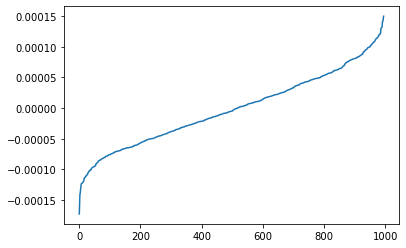

In [35]:
test[test["date"] == "2016-02-17"]["ppf_normalised"].sort_values().reset_index(
    drop=True
).plot()

In [2]:
f_matrix = pd.read_parquet("../data/f_matrix.parquet")
b_matrix = pd.read_parquet("../data/b_matrix.parquet")

data = Data(f_matrix=f_matrix, b_matrix=b_matrix)

In [3]:
data.f_matrix

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.376,-0.699,-0.507,0.4536,-0.0752,-0.2548,-0.191619
1,2016-02-17,-1.121,1.073,0.234,0.4986,0.0022,0.6890,-0.596857
2,2016-02-17,-0.384,-0.097,0.100,0.9720,-0.1626,0.1913,0.562714
3,2016-02-17,-0.343,0.542,0.143,0.1034,-0.6422,-0.1259,0.988381
4,2016-02-17,-0.562,0.137,-0.213,-0.1744,-0.5152,0.0130,-0.602000
...,...,...,...,...,...,...,...,...
50029,2017-01-25,-1.007,0.638,0.940,-0.0046,0.3900,-0.7713,0.752190
50030,2017-01-25,-1.314,0.000,1.711,2.7674,2.8544,-2.7873,1.594667
50031,2017-01-25,-1.124,0.950,1.456,0.4290,0.0460,-0.3703,-0.140476
50032,2017-01-25,-0.432,0.205,1.976,-0.1886,1.1320,-0.0923,0.229143


In [37]:
data.orthogonalize()

0

In [39]:
f0 = data.f_matrix

In [40]:
f0

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.357340,0.045901,-0.140126,0.016757,-0.010487,0.206270,0.194768
1,2016-02-17,-0.947908,-0.144532,0.957067,-0.112393,-0.004016,0.299107,-0.063951
2,2016-02-17,-0.553144,0.012468,0.172805,0.017962,-0.012729,0.184492,-0.120419
3,2016-02-17,-0.146176,-0.054659,0.147837,0.154262,-0.013102,0.184454,-0.114617
4,2016-02-17,-0.553759,0.108858,-0.269345,-0.056787,-0.005559,-0.273830,-0.029593
...,...,...,...,...,...,...,...,...
50029,2017-01-25,-0.911205,0.006219,-0.005687,-0.196143,-0.006242,-0.278804,-0.027164
50030,2017-01-25,-1.402984,0.090743,0.660005,-0.060024,0.035416,-0.297900,0.352811
50031,2017-01-25,-1.055837,0.021563,0.243851,0.061412,0.009276,0.046042,-0.320851
50032,2017-01-25,-0.598840,0.032449,0.160791,-0.036928,0.091340,0.038486,0.111003


  0%|          | 0/7 [00:00<?, ?it/s]

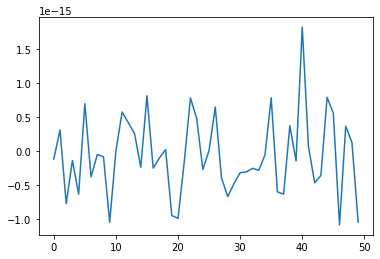

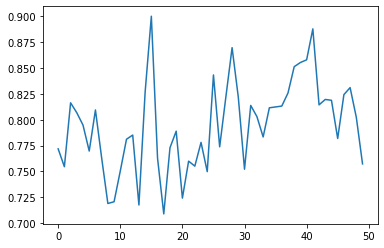

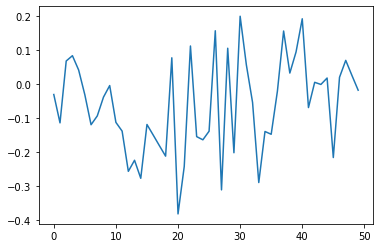

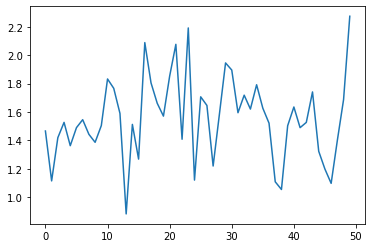

ZeroDivisionError: division by zero

In [54]:
for col in tqdm(f0.columns[1:]):
    mn_tg = []
    std_tg = []
    kurt_tg = []
    skew_tg = []
    for epoch in f0.iloc[:, 0].unique():
        f0_date = f0[col][f0["date"] == epoch]
        std = f0_date.std()
        skew = scipy.stats.skew(f0_date)
        kurt = scipy.stats.kurtosis(f0_date)
        mn_tg.append(f0_date.mean())
        std_tg.append(std)
        skew_tg.append(skew)
        kurt_tg.append(kurt)
    mn_tg = np.array(mn_tg)
    plt.plot(mn_tg)
    plt.show()
    std_tg = np.array(std_tg)
    plt.plot(std_tg)
    plt.show()
    skew_tg = np.array(skew_tg)
    plt.plot(skew_tg)
    plt.show()
    kurt_tg = np.array(kurt_tg)
    plt.plot(kurt_tg)
    plt.show()
    1 / 0

In [21]:
data.gaussianize()

100%|██████████| 50/50 [00:00<00:00, 1654.31it/s]
/home/jovyan/work/feature-engineering/src/utils/gauss.py:180: UserWarning: Warning: No convergence after 1000 iterations. Increase max_iter.
  warnings.warn("Warning: No convergence after %d iterations. Increase max_iter." % max_iter)
100%|██████████| 7/7 [00:12<00:00,  1.72s/it]


0

In [22]:
data.f_matrix.head()

,date,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,2016-02-17,-0.351441,0.044647,-0.139018,0.016737,-0.010265,0.184375,0.159735
1,2016-02-17,-0.858209,-0.116943,0.757872,-0.086050,-0.004000,0.245014,-0.061648
2,2016-02-17,-0.532395,0.012446,0.170782,0.017934,-0.012348,0.168102,-0.108319
3,2016-02-17,-0.145759,-0.052308,0.146562,0.114401,-0.012690,0.168072,-0.103932
4,2016-02-17,-0.532945,0.095391,-0.261893,-0.050833,-0.005521,-0.228582,-0.029306


In [23]:
f0 = data.f_matrix.feature_0

<AxesSubplot:>

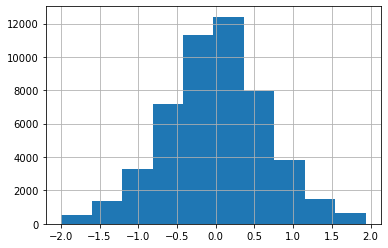

In [25]:
f0.hist(bins)